In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
import random
import numpy as np
%matplotlib inline

In [74]:
!ls data

sample_submission.csv  test.csv  test_images  train.csv  train_images


In [75]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/sample_submission.csv')

In [76]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [77]:
test_df.head()

,id_code,diagnosis
0,0005cfc8afb6,0
1,003f0afdcd15,0
2,006efc72b638,0
3,00836aaacf06,0
4,009245722fa4,0


In [78]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 2 columns):
id_code      1928 non-null object
diagnosis    1928 non-null int64
dtypes: int64(1), object(1)
memory usage: 30.2+ KB


(None, None)

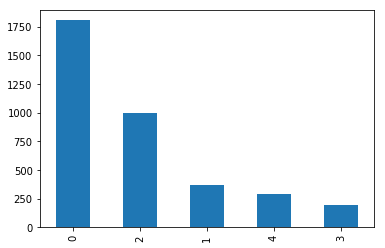

In [79]:
train_df['diagnosis'].value_counts().plot(kind="bar")

In [80]:
i = 0
img = mpimg.imread('data/train_images/%s.png' % train_df.iloc[i]["id_code"])

In [81]:
img.shape


(2136, 3216, 3)

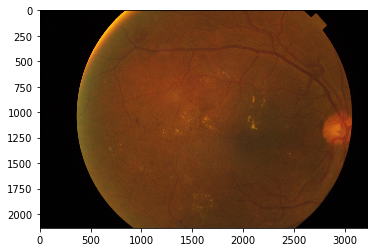

In [82]:
plt.imshow(img)

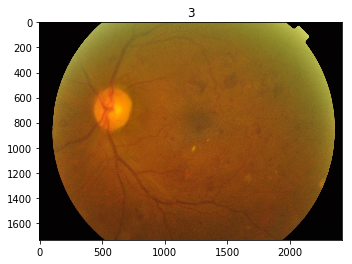

In [83]:
# plot some random training images with their ground truth labels
i = random.choice(range(train_df.shape[0]))
img = mpimg.imread('data/train_images/' + train_df.iloc[i]['id_code'] + '.png')
plt.imshow(img)
plt.title(train_df.iloc[i]['diagnosis'])
plt.show()

In [84]:
train_df['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [86]:
SEED=0
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000 # use 1000 when you just want to explore new idea, use -1 for full train



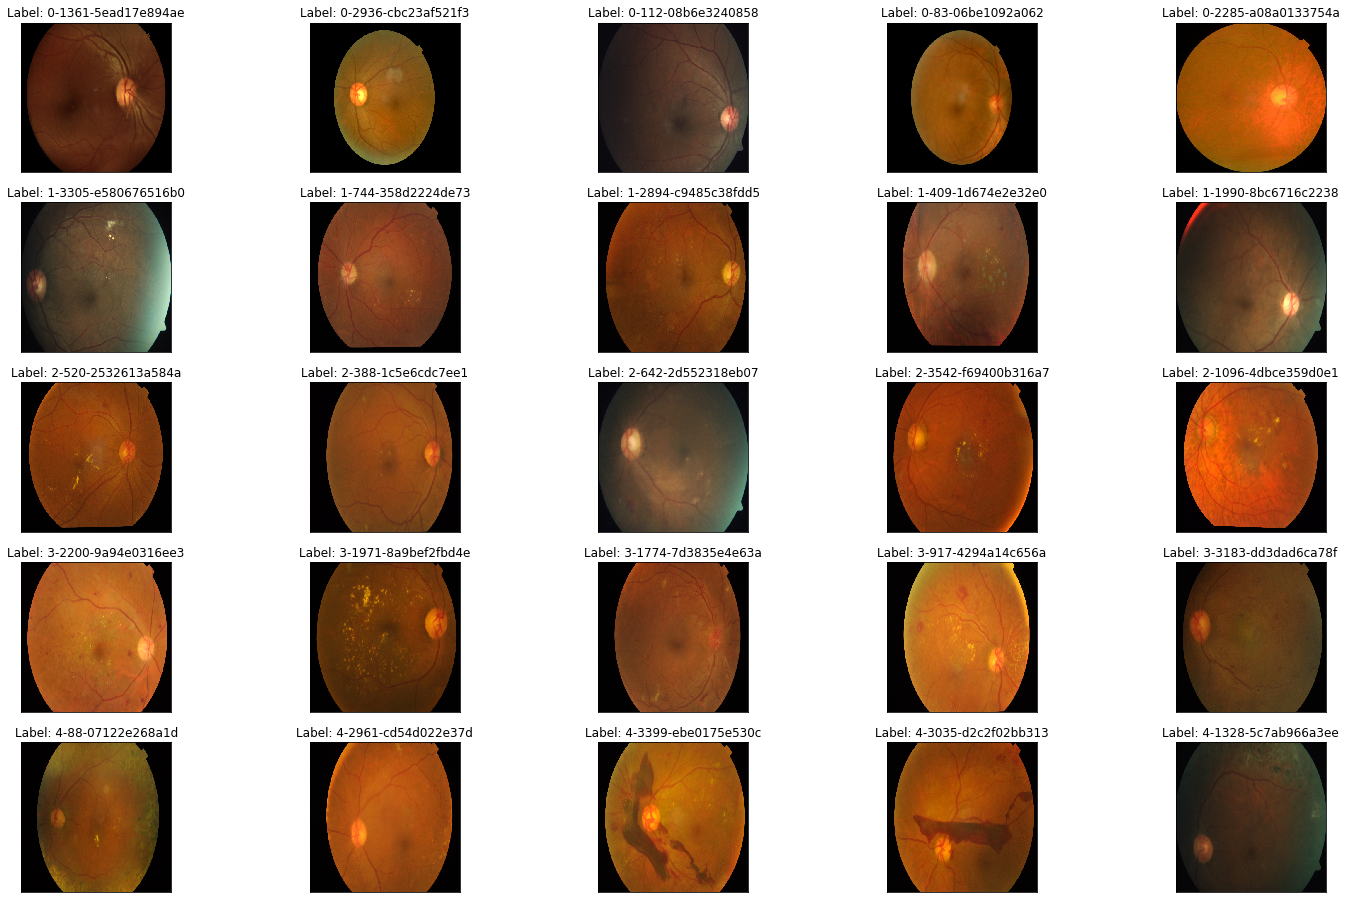

In [99]:

fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )
        

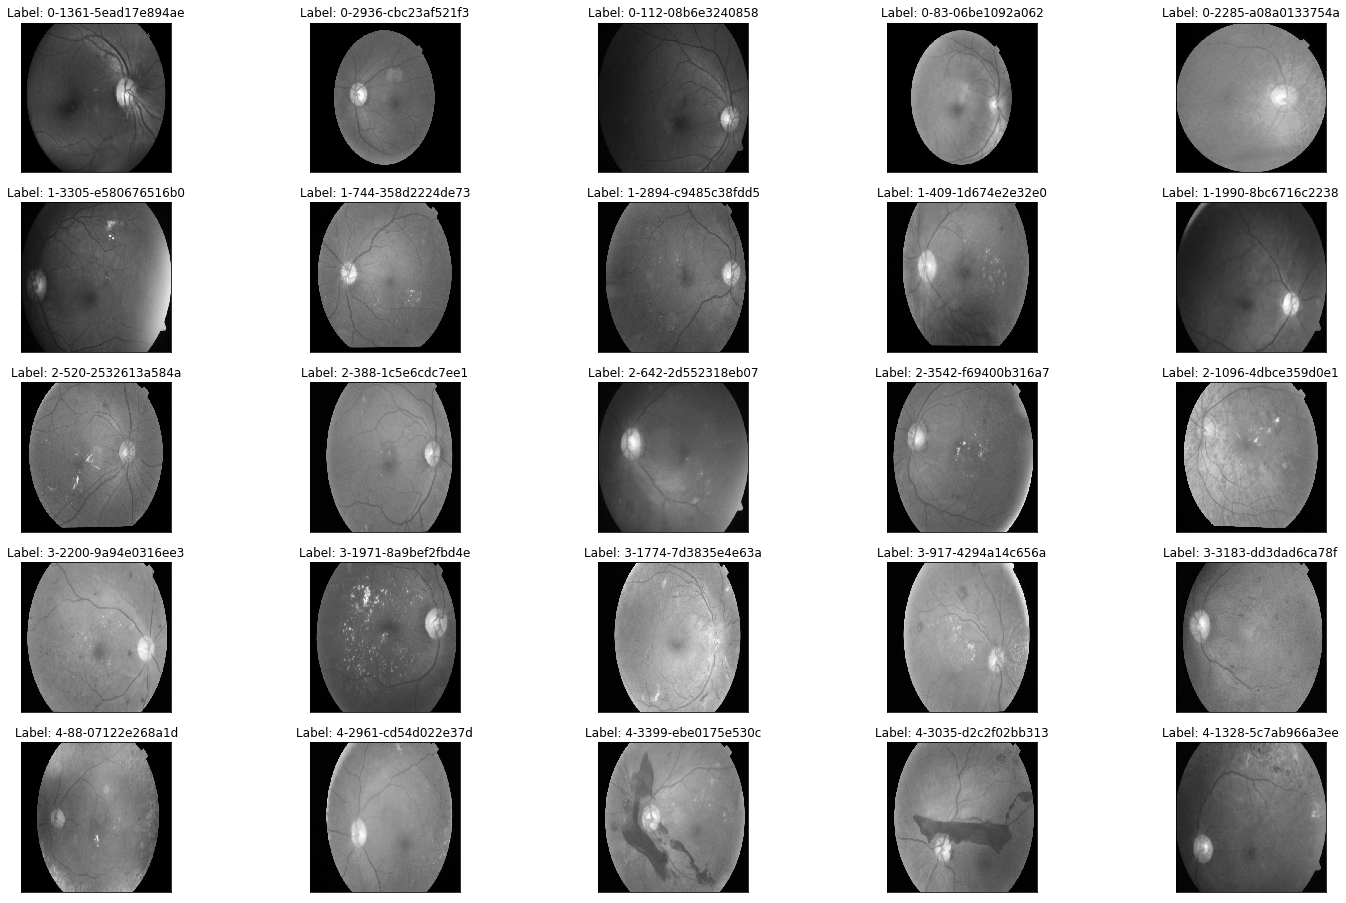

In [89]:
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image=cv2.addWeighted ( image, 0 , cv2.GaussianBlur( image , (0 ,0 ) , 10) ,-4 ,128)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )



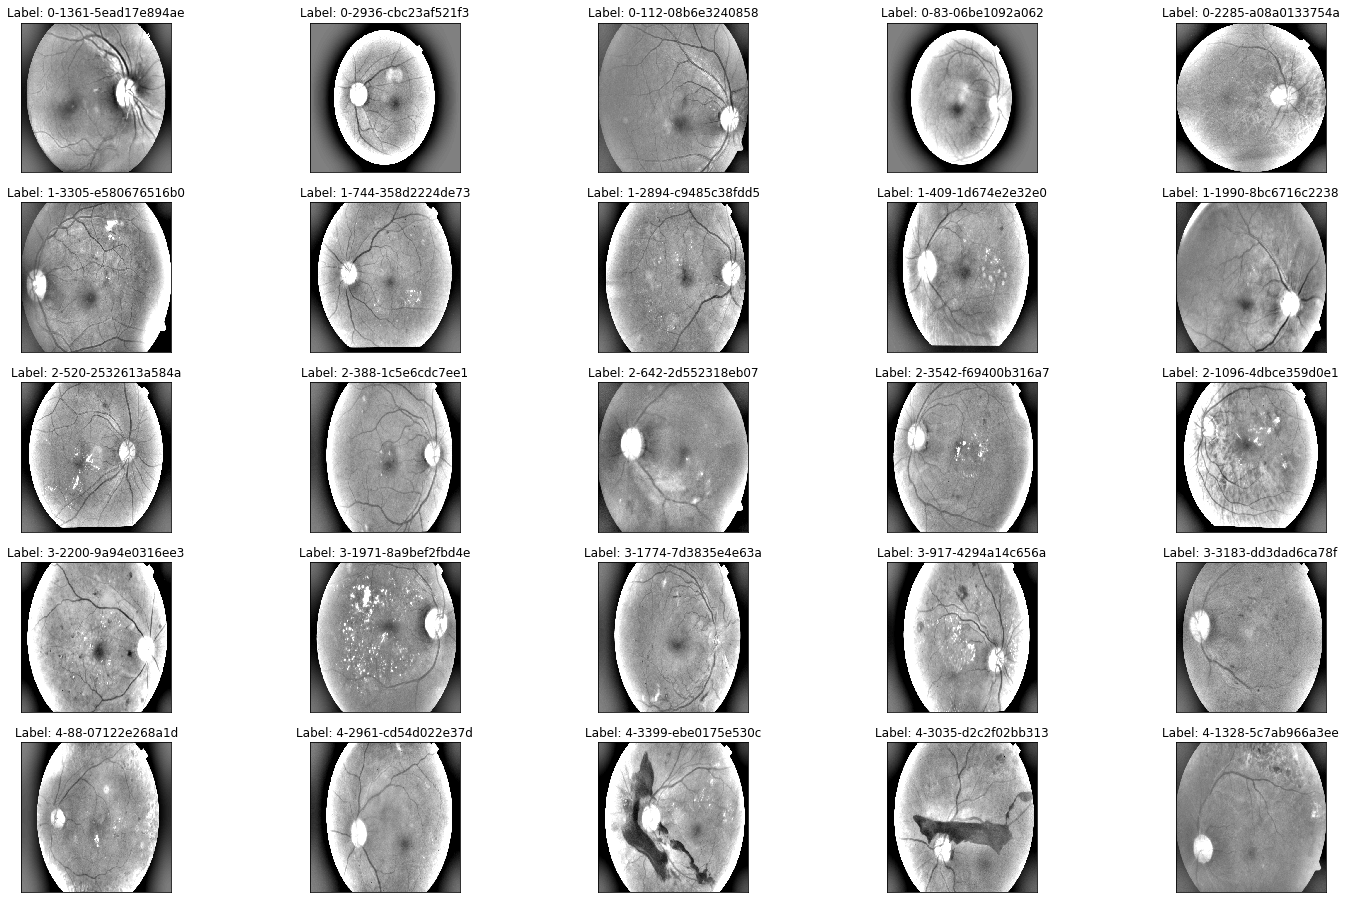

In [103]:
fig = plt.figure(figsize=(25, 16))
for class_id in sorted(train_df['diagnosis'].unique()):
    for i, (idx, row) in enumerate(train_df.loc[train_df['diagnosis'] == class_id].sample(5, random_state=SEED).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path=f"data/train_images/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) # the trick is to add this line

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

In [97]:
image.shape
image = image.reshape(1, 512, 512)

In [98]:
np.repeat(image, 3, axis=0).shape

(3, 512, 512)

In [114]:
np.repeat(image, 3, axis=-1).shape

(512, 1536)

In [104]:
image.shape

(512, 512)

In [111]:
np.repeat?

In [109]:
cv2.repeat(image, 1, 1, 3).shape

(512, 512)

In [116]:
cv2.addWeighted?